1. 결정 트리 알고리즘으로, 기존에 수행했던 응용 과제 데이터셋을 예측해 봅시다.
회귀분석의 경우, DecisionTreeRegressor() 모듈을 사용합시다. GPT 활용해도 좋습니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# heart_data
heart = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\Day1\\heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_input = heart[['chol','thalachh','age']].to_numpy()
heart_target = heart['output'].to_numpy()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(heart_input, 
                                                                      heart_target,
                                                                      test_size=0.2, 
                                                                      random_state=42)

In [5]:
# 과적합 확인.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.5901639344262295


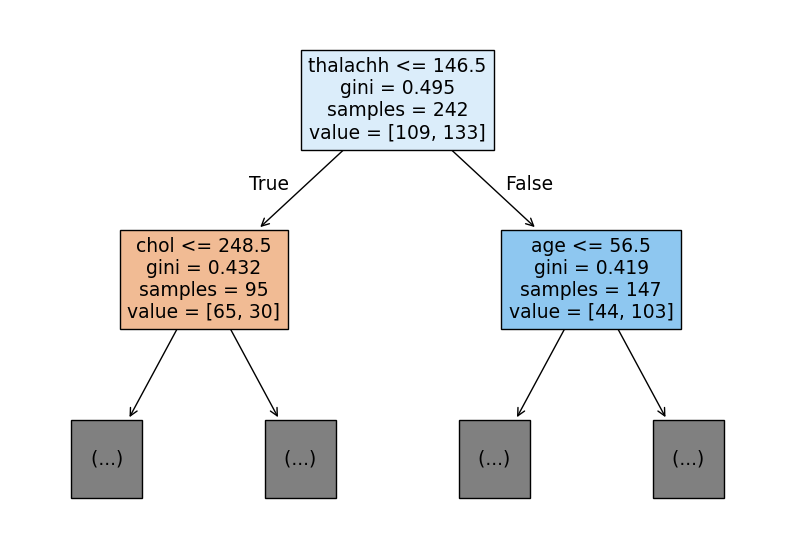

In [6]:
# 지니지수 확인
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['chol','thalachh','age'])
plt.show()

In [7]:
dt = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.6065573770491803


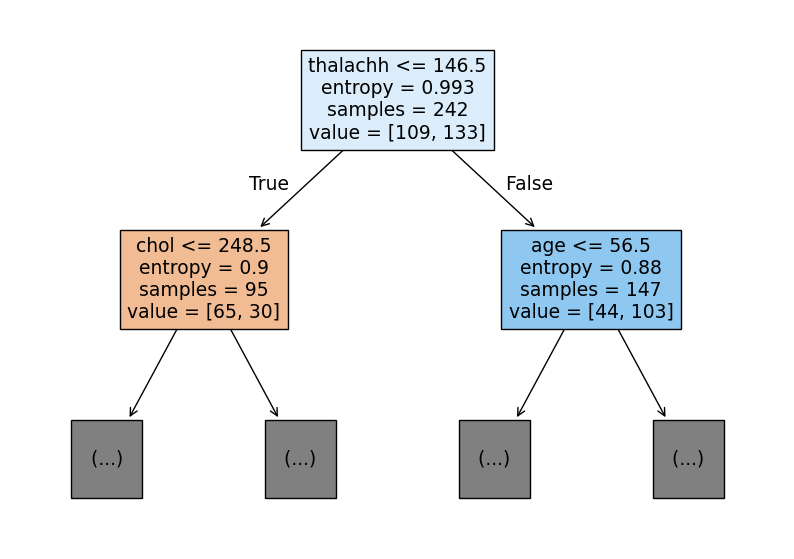

In [8]:
# entropy 값이 높게 나오므로 데이터는 균형적임을 확인.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['chol','thalachh','age'])
plt.show()

In [9]:
print(dt.feature_importances_)

[0.3821238  0.33905781 0.27881838]


In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.7479338842975206
0.639344262295082


In [11]:
print(dt.feature_importances_)

[0.15818175 0.5708221  0.27099615]


In [12]:
# Boston
Boston = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\Day2\\boston.csv")
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
data_input = Boston[['ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT']].to_numpy()
data_target = Boston['MEDV'].to_numpy()

In [14]:
train_input, test_input, train_target, test_target = train_test_split(data_input,
                                                                      data_target,
                                                                      test_size=0.2, 
                                                                      random_state=27
                                                                      )

In [15]:
# 과적합 확인
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=27)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.7806820475702133


In [16]:
dt = DecisionTreeRegressor(max_depth=2, random_state=27)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.6936481700777214
0.6938438597611059


In [53]:
print(dt.feature_importances_)

[0.         0.         0.         0.76033367 0.         0.
 0.         0.         0.23966633]
